## Linear Regression with Pytorch

In [3]:
import matplotlib.pyplot as plt

In [4]:
import torch
from torch import nn


class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype = torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype = torch.float))
        
    # Forward method to define the computation method in the model
    def forward(self, feature: torch.Tensor) -> torch.Tensor: # feature: is the input data
        return self.weights * feature + self.bias
        
        

In [5]:
# Instantiate a model
model_fn = LinearRegression()
model_fn.weights , model_fn.bias

(Parameter containing:
 tensor([-1.2568], requires_grad=True),
 Parameter containing:
 tensor([1.0670], requires_grad=True))

In [6]:
# Dummy dataset 
X = torch.range(start=0, end=1, step=0.02).unsqueeze(dim = 1)
y = 0.7 * X + 0.3  
print(f"Features: {X}")
print(f"Targets: {y}")

Features: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800],
        [1.0000]])
Targets: tensor([[0.3000],
        [0.3140],
        [0.3280],
        

/var/folders/4d/rdp7yqvj08d6bhjwt9ryxkth0000gn/T/ipykernel_798/3249183443.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  X = torch.range(start=0, end=1, step=0.02).unsqueeze(dim = 1)


In [7]:
with torch.inference_mode():
    y_preds = model_fn(X)
    
y_preds

tensor([[ 1.0670],
        [ 1.0418],
        [ 1.0167],
        [ 0.9916],
        [ 0.9664],
        [ 0.9413],
        [ 0.9162],
        [ 0.8910],
        [ 0.8659],
        [ 0.8407],
        [ 0.8156],
        [ 0.7905],
        [ 0.7653],
        [ 0.7402],
        [ 0.7151],
        [ 0.6899],
        [ 0.6648],
        [ 0.6397],
        [ 0.6145],
        [ 0.5894],
        [ 0.5642],
        [ 0.5391],
        [ 0.5140],
        [ 0.4888],
        [ 0.4637],
        [ 0.4386],
        [ 0.4134],
        [ 0.3883],
        [ 0.3632],
        [ 0.3380],
        [ 0.3129],
        [ 0.2877],
        [ 0.2626],
        [ 0.2375],
        [ 0.2123],
        [ 0.1872],
        [ 0.1621],
        [ 0.1369],
        [ 0.1118],
        [ 0.0866],
        [ 0.0615],
        [ 0.0364],
        [ 0.0112],
        [-0.0139],
        [-0.0390],
        [-0.0642],
        [-0.0893],
        [-0.1144],
        [-0.1396],
        [-0.1647],
        [-0.1899]])

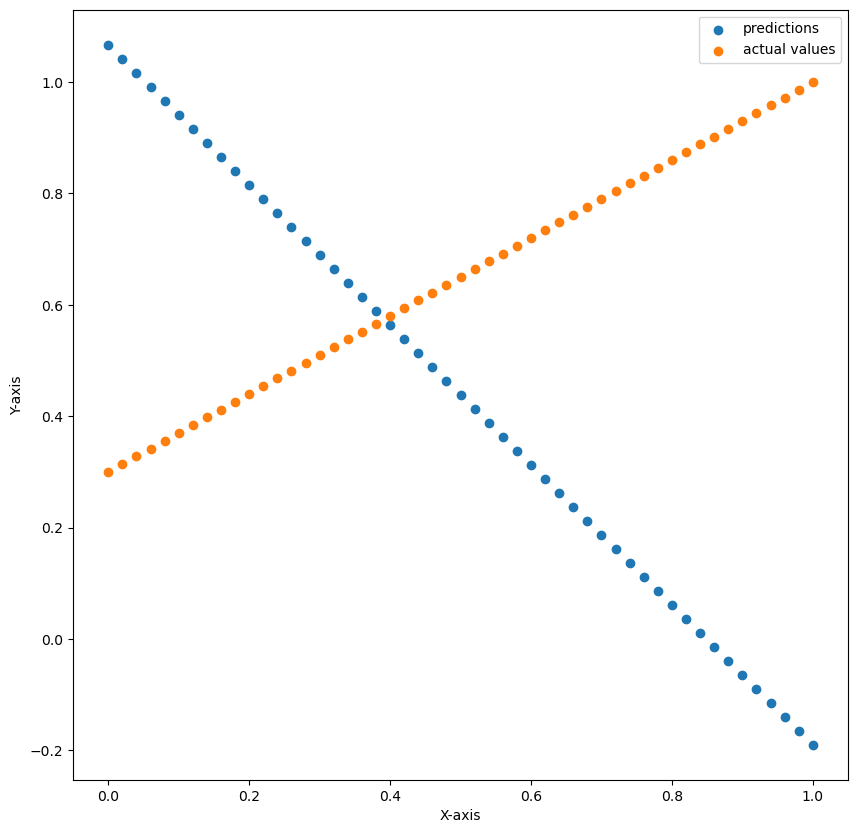

In [25]:
def plot_predictions_and_targets(features, predictions, targets):
    plt.figure(figsize=(10,10))
    plt.scatter(features, predictions, label = "predictions")
    plt.scatter(features, targets, label = "actual values")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()
    
plot_predictions_and_targets(X, y_preds, y)

In [11]:
model_fn.state_dict()

OrderedDict([('weights', tensor([-1.2568])), ('bias', tensor([1.0670]))])

In [12]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params= model_fn.parameters(), lr=0.01, momentum=0.9)

In [21]:
epochs = 200

for epoch in range(epochs):
     model_fn.train()
     y_pred = model_fn(X)
     loss = loss_fn(y_pred, y)
     optimizer.zero_grad() 
     loss.backward()
     optimizer.step()


LinearRegression()

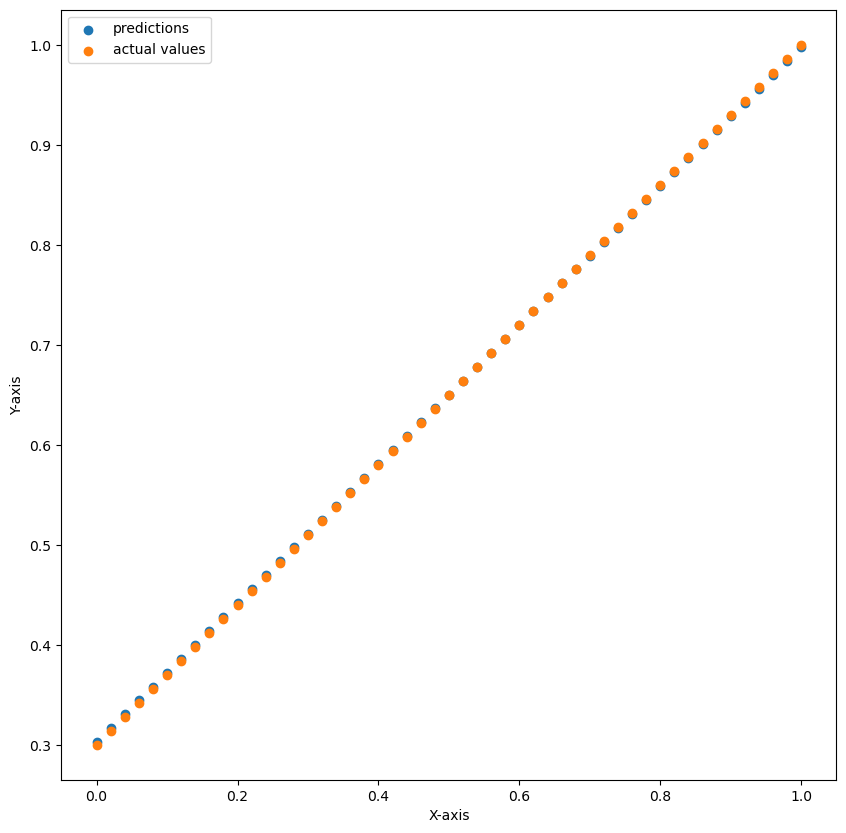

In [26]:
y_preds_train = model_fn(X).detach().numpy()
plot_predictions_and_targets(X, y_preds_train, y)